In [62]:
import pandas as pd
import numpy as np
df = pd.read_csv('../data/processed/no_feature_select.csv')
df.values.shape

(37571, 408)

In [63]:
df.columns.tolist()[:20]

['Unnamed: 0',
 'OUTPUT_LABEL',
 '1Y_PRIOR_ADM',
 'LENGTH_OF_STAY_DAYS',
 'AGE',
 'CURR_SERVICE_CMED',
 'CURR_SERVICE_CSURG',
 'CURR_SERVICE_MED',
 'CURR_SERVICE_NMED',
 'CURR_SERVICE_NSURG',
 'CURR_SERVICE_OMED',
 'CURR_SERVICE_ORTHO',
 'CURR_SERVICE_SURG',
 'CURR_SERVICE_TRAUM',
 'CURR_SERVICE_TSURG',
 'CURR_SERVICE_VSURG',
 'SECTIONHEADER_Anesthesia',
 'SECTIONHEADER_Evaluation and management',
 'SECTIONHEADER_Medicine',
 'SECTIONHEADER_Pathology and laboratory']

In [64]:
df.drop('Unnamed: 0', axis=1, inplace=True)
# check if there are empty values
df.isna().sum().sum()

0

In [65]:
y = df.OUTPUT_LABEL.values
X = df.drop(['OUTPUT_LABEL'], axis=1).values
print(y.shape)
print(X.shape)

(37571,)
(37571, 406)


In [66]:
# Set a seed for reproducibility
SEED = 222
np.random.seed(SEED)

# split the data into train and test sets
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=SEED)

# scaling is necessary for some algorithms, such as SVM and neural nets, scale the data to min-max 0-1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [67]:
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

start_time = time.monotonic()
clf = LogisticRegression(C=100, solver='liblinear', random_state=SEED, class_weight='balanced', max_iter=200)
clf.fit(Xtrain_scaled,ytrain)
ypred = clf.predict(Xtest_scaled)
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))
print(time.monotonic()-start_time)
start_time = time.monotonic()

[[4837 2218]
 [ 170  290]]
              precision    recall  f1-score   support

         0.0       0.97      0.69      0.80      7055
         1.0       0.12      0.63      0.20       460

    accuracy                           0.68      7515
   macro avg       0.54      0.66      0.50      7515
weighted avg       0.91      0.68      0.76      7515

18.548394928999187


Using all features without selection produces poor results

In [68]:
# Let's see if droping correlated numerical features helps
df = pd.read_csv('../data/processed/cor_num_droped.csv')
df.values.shape

(37571, 363)

In [69]:
df.columns.tolist()[:20]

['Unnamed: 0',
 'OUTPUT_LABEL',
 '1Y_PRIOR_ADM',
 'LENGTH_OF_STAY_DAYS',
 'AGE',
 'CURR_SERVICE_CMED',
 'CURR_SERVICE_CSURG',
 'CURR_SERVICE_MED',
 'CURR_SERVICE_NMED',
 'CURR_SERVICE_NSURG',
 'CURR_SERVICE_OMED',
 'CURR_SERVICE_ORTHO',
 'CURR_SERVICE_SURG',
 'CURR_SERVICE_TRAUM',
 'CURR_SERVICE_TSURG',
 'CURR_SERVICE_VSURG',
 'SECTIONHEADER_Anesthesia',
 'SECTIONHEADER_Evaluation and management',
 'SECTIONHEADER_Medicine',
 'SECTIONHEADER_Pathology and laboratory']

In [70]:
df.drop('Unnamed: 0', axis=1, inplace=True)
y = df.OUTPUT_LABEL.values
X = df.drop(['OUTPUT_LABEL'], axis=1).values
print(y.shape)
print(X.shape)

(37571,)
(37571, 361)


In [71]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=SEED)
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [72]:
start_time = time.monotonic()
clf = LogisticRegression(C=100, solver='liblinear', random_state=SEED, class_weight='balanced', max_iter=200)
clf.fit(Xtrain_scaled,ytrain)
ypred = clf.predict(Xtest_scaled)
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))
print(time.monotonic()-start_time)
start_time = time.monotonic()

[[4786 2269]
 [ 174  286]]
              precision    recall  f1-score   support

         0.0       0.96      0.68      0.80      7055
         1.0       0.11      0.62      0.19       460

    accuracy                           0.67      7515
   macro avg       0.54      0.65      0.49      7515
weighted avg       0.91      0.67      0.76      7515

10.931846082999982


In [73]:
# doesn't help, put the numerical features back and remove categorical features (Theil's U < 0.05 dropped)
df = pd.read_csv('../data/processed/cat_005_TU_dropped.csv')
df.values.shape

(37571, 200)

In [74]:
df.drop('Unnamed: 0', axis=1, inplace=True)
y = df.OUTPUT_LABEL.values
X = df.drop(['OUTPUT_LABEL'], axis=1).values
print(y.shape)
print(X.shape)

(37571,)
(37571, 198)


In [75]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=SEED)
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [76]:
start_time = time.monotonic()
clf = LogisticRegression(C=100, solver='liblinear', random_state=SEED, class_weight='balanced', max_iter=200)
clf.fit(Xtrain_scaled,ytrain)
ypred = clf.predict(Xtest_scaled)
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))
print(time.monotonic()-start_time)
start_time = time.monotonic()

[[4874 2181]
 [ 176  284]]
              precision    recall  f1-score   support

         0.0       0.97      0.69      0.81      7055
         1.0       0.12      0.62      0.19       460

    accuracy                           0.69      7515
   macro avg       0.54      0.65      0.50      7515
weighted avg       0.91      0.69      0.77      7515

12.385617429999911


In [77]:
# Precision and recall increased a little, let's see if removing less categorical features helps
df = pd.read_csv('../data/processed/cat_0025_TU_dropped.csv')
df.values.shape

(37571, 246)

In [78]:
df.drop('Unnamed: 0', axis=1, inplace=True)
y = df.OUTPUT_LABEL.values
X = df.drop(['OUTPUT_LABEL'], axis=1).values
print(y.shape)
print(X.shape)

(37571,)
(37571, 244)


In [79]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=SEED)
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [80]:
start_time = time.monotonic()
clf = LogisticRegression(C=100, solver='liblinear', random_state=SEED, class_weight='balanced', max_iter=200)
clf.fit(Xtrain_scaled,ytrain)
ypred = clf.predict(Xtest_scaled)
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))
print(time.monotonic()-start_time)
start_time = time.monotonic()

[[4826 2229]
 [ 177  283]]
              precision    recall  f1-score   support

         0.0       0.96      0.68      0.80      7055
         1.0       0.11      0.62      0.19       460

    accuracy                           0.68      7515
   macro avg       0.54      0.65      0.50      7515
weighted avg       0.91      0.68      0.76      7515

13.111595369000497


In [81]:
# it dpes not help, let's try removing cat featured<0.05 TU and num features <0.8
df = pd.read_csv('../data/processed/cat_005_TU_num08_dropped.csv')
df.values.shape

(37571, 155)

In [82]:
df.drop('Unnamed: 0', axis=1, inplace=True)
y = df.OUTPUT_LABEL.values
X = df.drop(['OUTPUT_LABEL'], axis=1).values
print(y.shape)
print(X.shape)

(37571,)
(37571, 153)


In [83]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=SEED)
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [85]:
start_time = time.monotonic()
clf = LogisticRegression(C=100, solver='liblinear', random_state=SEED, class_weight='balanced', max_iter=200)
clf.fit(Xtrain_scaled,ytrain)
ypred = clf.predict(Xtest_scaled)
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))
print(time.monotonic()-start_time)
start_time = time.monotonic()

[[4803 2252]
 [ 178  282]]
              precision    recall  f1-score   support

         0.0       0.96      0.68      0.80      7055
         1.0       0.11      0.61      0.19       460

    accuracy                           0.68      7515
   macro avg       0.54      0.65      0.49      7515
weighted avg       0.91      0.68      0.76      7515

6.036808848999499


In [86]:
# let's see if removing more categorical features helps
df = pd.read_csv('../data/processed/cat_01_TU_dropped.csv')
df.values.shape

(37571, 154)

In [87]:
df.drop('Unnamed: 0', axis=1, inplace=True)
y = df.OUTPUT_LABEL.values
X = df.drop(['OUTPUT_LABEL'], axis=1).values
print(y.shape)
print(X.shape)

(37571,)
(37571, 152)


In [88]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=SEED)
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [89]:
start_time = time.monotonic()
clf = LogisticRegression(C=100, solver='liblinear', random_state=SEED, class_weight='balanced', max_iter=200)
clf.fit(Xtrain_scaled,ytrain)
ypred = clf.predict(Xtest_scaled)
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))
print(time.monotonic()-start_time)
start_time = time.monotonic()

[[4949 2106]
 [ 181  279]]
              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81      7055
         1.0       0.12      0.61      0.20       460

    accuracy                           0.70      7515
   macro avg       0.54      0.65      0.50      7515
weighted avg       0.91      0.70      0.77      7515

8.917227051999362


In [90]:
# precision went up a little, let's remove uninformative numerical features as well
df = pd.read_csv('../data/processed/cat_01TU_num_01cor.csv')
df.values.shape

(37571, 121)

In [91]:
df.drop('Unnamed: 0', axis=1, inplace=True)
y = df.OUTPUT_LABEL.values
X = df.drop(['OUTPUT_LABEL'], axis=1).values
print(y.shape)
print(X.shape)

(37571,)
(37571, 119)


In [92]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=SEED)
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [93]:
start_time = time.monotonic()
clf = LogisticRegression(C=100, solver='liblinear', random_state=SEED, class_weight='balanced', max_iter=200)
clf.fit(Xtrain_scaled,ytrain)
ypred = clf.predict(Xtest_scaled)
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))
print(time.monotonic()-start_time)
start_time = time.monotonic()

[[4960 2095]
 [ 182  278]]
              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81      7055
         1.0       0.12      0.60      0.20       460

    accuracy                           0.70      7515
   macro avg       0.54      0.65      0.50      7515
weighted avg       0.91      0.70      0.78      7515

7.210472441000093


In [94]:
# let's see how top numerical features corr_ratio>0.06 and cat features theils u > 0.015 perform
df = pd.read_csv('../data/processed/topcat_015_topnum_006.csv')
df.values.shape

(37571, 50)

In [95]:
df.drop('Unnamed: 0', axis=1, inplace=True)
y = df.OUTPUT_LABEL.values
X = df.drop(['OUTPUT_LABEL'], axis=1).values
print(y.shape)
print(X.shape)

(37571,)
(37571, 48)


In [101]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [102]:
start_time = time.monotonic()
clf = LogisticRegression(C=100, solver='liblinear', random_state=SEED, class_weight='balanced', max_iter=200)
clf.fit(Xtrain_scaled,ytrain)
ypred = clf.predict(Xtest)
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))
print(time.monotonic()-start_time)
start_time = time.monotonic()

[[ 599 6450]
 [  30  436]]
              precision    recall  f1-score   support

         0.0       0.95      0.08      0.16      7049
         1.0       0.06      0.94      0.12       466

    accuracy                           0.14      7515
   macro avg       0.51      0.51      0.14      7515
weighted avg       0.90      0.14      0.15      7515

1.7548951799981296


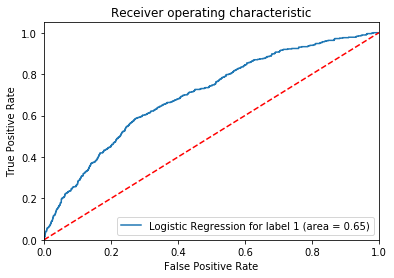

In [100]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
fpr1, tpr1, thresholds1 = roc_curve(ytest, clf.predict_proba(Xtest_scaled)[:,1])
logit_roc_auc = roc_auc_score(ytest, clf.predict(Xtest_scaled))
plt.figure()
#plt.plot(fpr0, tpr0, label='Logistic Regression for label 0 (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr1, tpr1, label='Logistic Regression for label 1 (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()